# Intro to coffea.hist

A histogram in Coffea is a `N-D` collection of different categories, along with bin(s)

Let's start by importing some necessary libraries

In [1]:
from coffea import hist
import matplotlib.pyplot as plt #plot histograms
import numpy as np

Simple example from the Coffea manual

In [2]:
h = hist.Hist("Observed bird count",
               hist.Cat("species", "Bird species"),
               hist.Bin("x", "x coordinate [m]", 20, -5, 5),
               hist.Bin("y", "y coordinate [m]", 20, -5, 5),
             )

Now we'ss use `fill()` to add 10 `ducks`, with random `x-y` values using `numpy.random`, each with a weight of 3

In [3]:
h.fill(species='ducks', x=np.random.normal(size=10), y=np.random.normal(size=10), weight=np.ones(10) * 3)

Now I'll add another species

In [4]:
h.fill(species='phoenix', x=np.random.normal(size=1), y=np.random.normal(size=1), weight=np.ones(1))

Let's create a plot to draw everthing in using matplotlib and the `plot2d()` method in `coffea.hist`

In [5]:
h.integrate('species')

<Hist (x,y) instance at 0x7f5374b69520>

<AxesSubplot:xlabel='x coordinate [m]', ylabel='y coordinate [m]'>

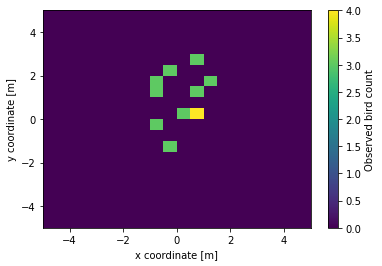

In [6]:
hist.plot2d(h.integrate('species'), xaxis='x')

Now we can play with the axes to learn some more<br>
We can view the axes with `h.axes()`

In [7]:
h.axes()

(<Cat (name=species) instance at 0x7f5374b69160>,
 <Bin (name=x) instance at 0x7f5374b691c0>,
 <Bin (name=y) instance at 0x7f5374b69220>)

We can remove the `x`-axis by integrating it out with `integrate()`

In [8]:
h.integrate('x').integrate('species')

<Hist (y) instance at 0x7f53729e89a0>

And now we can make a `1D` plot, in this case of `species` and `y coordinate`

<AxesSubplot:xlabel='y coordinate [m]', ylabel='Observed bird count'>

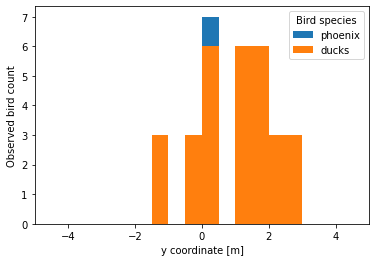

In [9]:
hist.plot1d(h.integrate('x'), stack=True) #stack makes a stack plot

## A more pratical, physics example

In this example, I'll load a set of histograms from `histos/ttH_private_UL17_fixWeights_objects.pkl.gz`<br>
This is a pickle file created by TopCoffea

First, let's import all the relevent packages (same as before, but here to make this section stand alone)

In [10]:
import pickle #read pickle file
from coffea import hist
import topcoffea.modules.HistEFT as HistEFT
import gzip #read zipped pickle file
import matplotlib.pyplot as plt #plot histograms
import numpy as np

Next, we'll open the pickle file, and load its histograms into a dictionary

In [11]:
#This only works in Jupyter notebooks. Run the wget command directly in the terminal otherwise
!mkdir -p ../histos/
!wget -nc https://cernbox.cern.ch/index.php/s/JxAIaZhXZo4mGkg/download -O ../histos/ttH_private_UL17_fixWeights_objects.pkl.gz
fin = '../histos/ttH_private_UL17_fixWeights_objects.pkl.gz'
hists = {} #dictionary of histograms
with gzip.open(fin) as fin:
  hin = pickle.load(fin)
  for k in hin.keys():
    if k in hists: hists[k]+=hin[k]
    else:               hists[k]=hin[k]

/bin/bash: /opt/conda/lib/libtinfo.so.6: no version information available (required by /bin/bash)
/bin/bash: /opt/conda/lib/libtinfo.so.6: no version information available (required by /bin/bash)
--2021-06-16 16:03:11--  https://cernbox.cern.ch/index.php/s/JxAIaZhXZo4mGkg/download
Resolving cernbox.cern.ch (cernbox.cern.ch)... 128.142.32.38, 188.184.97.72, 128.142.53.35, ...
Connecting to cernbox.cern.ch (cernbox.cern.ch)|128.142.32.38|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 64307305 (61M) [application/gzip]
Saving to: ‘../histos/ttH_private_UL17_fixWeights_objects.pkl.gz’

../histos/ttH_priva 100%[===================>]  61.33M  16.7MB/s    in 3.7s    

Last-modified header invalid -- time-stamp ignored.
2021-06-16 16:03:16 (16.7 MB/s) - ‘../histos/ttH_private_UL17_fixWeights_objects.pkl.gz’ saved [64307305/64307305]



Now we'll grab the histogram for `njets`

In [12]:
h = hists['njets'] #load histogram of njets distribution

Each histogram is a `N-D` collection of different categories

In [13]:
h.axes() #all axes in this version

(<Cat (name=sample) instance at 0x7f548d803e80>,
 <Cat (name=channel) instance at 0x7f548d803f40>,
 <Cat (name=cut) instance at 0x7f548d8126a0>,
 <Cat (name=sumcharge) instance at 0x7f548d8128e0>,
 <Cat (name=systematic) instance at 0x7f548d812a30>,
 <Bin (name=njets) instance at 0x7f548d812af0>)

You can retrieve the histogram's bin contents with the `values()` method

In [14]:
h.values() #this is large, and Jupyter wants to show the whole thing
print(list(h.values())[0],'...') #just print the first entry

('ttHJet_privateUL17', 'eeSSonZ', 'base', 'ch+', 'nominal') ...


To select a specific label in a category we must use `integrate()` (the other option is `sum()` which combines all the lables in a category together)

In [15]:
ch3l = ['eemSSonZ', 'eemSSoffZ', 'mmeSSonZ', 'mmeSSoffZ','eeeSSonZ', 'eeeSSoffZ', 'mmmSSonZ', 'mmmSSoffZ'] #define ch3l to make things cleaner
h = h.integrate('cut','base').integrate('channel',ch3l).integrate('sumcharge', 'ch+').integrate('systematic', 'nominal')

We've now integrated outeverything but the type of samples:

In [16]:
h.values()

{('ttHJet_privateUL17',): array([0.07281313, 0.60113587, 1.78300836, 2.35064192, 1.73882553,
        0.98864291, 0.40450678, 0.12870998, 0.02832856, 0.00800146])}

In [17]:
h.axes()

(<Cat (name=sample) instance at 0x7f548d803e80>,
 <Bin (name=njets) instance at 0x7f548d812af0>)

Let's create a plot to draw everthing in using matplotlib and the `plot1d()` method in `coffea.hist`

<AxesSubplot:xlabel='Jet multiplicity ', ylabel='Events'>

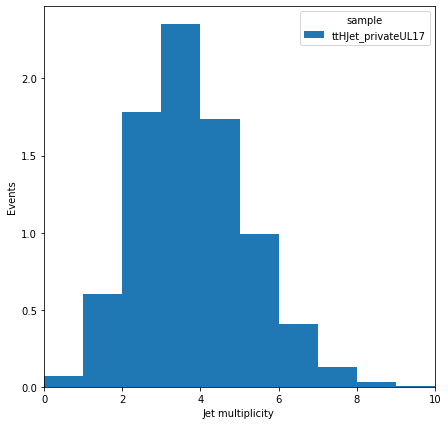

In [18]:
fig, ax = plt.subplots(1,1, figsize=(7,7)) #create an axis for plotting
hist.plot1d(h, stack=True)
#fig.show() #not needed in Jupyter, but this draws the figure in the terminal

# topcoffea.modules.HistEFT

I'll continue using the ```histos/plotsTopEFT.pkl.gz``` file from above<br>
Now we'll use methods that are unique to HistEFT (e.g. `set_wilson_coefficients()` to scale the Wilson Coefficient (WC) values)

The `HistEFT` class holds the structure constants ($S_0, S_{1j}, S_{2j},$ and $S_{3jk}$) we solved for when partins the EFT files, <br>
so the event yields are just a function of the WCs ($\vec{c}$):

\begin{equation}
N\left(\dfrac{\vec{c}}{\Lambda^2}\right) = S_0 + \sum_j S_{1j} \frac{c_j}{\Lambda^2} + \sum_j S_{2j} \frac{c_j^2}{\Lambda^4} + \sum_{j,k} S_{3jk} \frac{c_j}{\Lambda^2} \frac{c_k}{\Lambda^2}
\end{equation}

First, we'll scale the histogram to the SM (all `WCs=0`)

In [19]:
h.set_wilson_coefficients(np.zeros(h._nwc))

where `_nwc` is a local variable inside a HistEFT that stores how many WCs it contains<br>
The WCs are used whenever `values()` method is called

In [20]:
h.values()

{('ttHJet_privateUL17',): array([0.07281313, 0.60113587, 1.78300836, 2.35064192, 1.73882553,
        0.98864291, 0.40450678, 0.12870998, 0.02832856, 0.00800146])}

Plotting this should look the same as before, since by default the WCs are 0

<AxesSubplot:xlabel='Jet multiplicity ', ylabel='Events'>

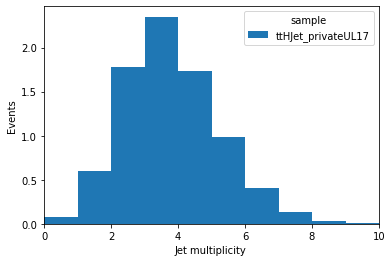

In [21]:
hist.plot1d(h, stack=True)

Now let's set them all to 1 to see that things change

In [22]:
h.set_wilson_coefficients(np.ones(h._nwc))

In [23]:
h.values()

{('ttHJet_privateUL17',): array([ 0.28840513,  3.14251926,  8.48740069, 11.90790139,  9.58551669,
         5.25475153,  2.16472929,  1.33508699,  0.24890812,  0.03036111])}

<AxesSubplot:xlabel='Jet multiplicity ', ylabel='Events'>

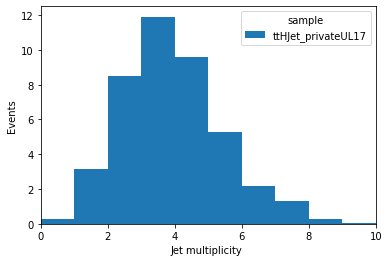

In [24]:
hist.plot1d(h, stack=True)

There's one last thing we must due in order to produce the predicted event yields.<br>
The EFT samples come normalized to $\sigma * w_{\mathrm{gen}}$<br>
In order to produce event yeilds, we must scale them by $\frac{\mathcal{L}}{\sum{w_{\mathrm{event}}^{\mathrm{SM}}}}$ , where $\sum{w_{\mathrm{event}}^{\mathrm{SM}}}$ is the sum of the event weights, evaluated at the SM.

First, load the `SumOfEFTweights` histogram

In [25]:
sow = hists['SumOfEFTweights'] #get histogram with sum of EFT weights

Next, set the WCs to the SM values of 0

In [26]:
sow.set_wilson_coefficients(np.zeros(sow._nwc)) #set to SM

Now sum over all the samples

In [27]:
sow = sow.sum('sample')

Finally, get the stored value

In [28]:
smsow = sow.values()[()][0]
print('Sum of EFT weights', smsow)

Sum of EFT weights 39430.66101814883


Now we can scale the desired histogram by $\frac{\mathcal{L}}{\sum{w_{\mathrm{event}}^{\mathrm{SM}}}}$

In [29]:
h.set_wilson_coefficients(np.zeros(h._nwc))
wgt = 1000*59.7/smsow
print('Scaling by', wgt)
h.scale(wgt) #2018 lumi of 59.7 fb^-1

Scaling by 1.5140501949110556


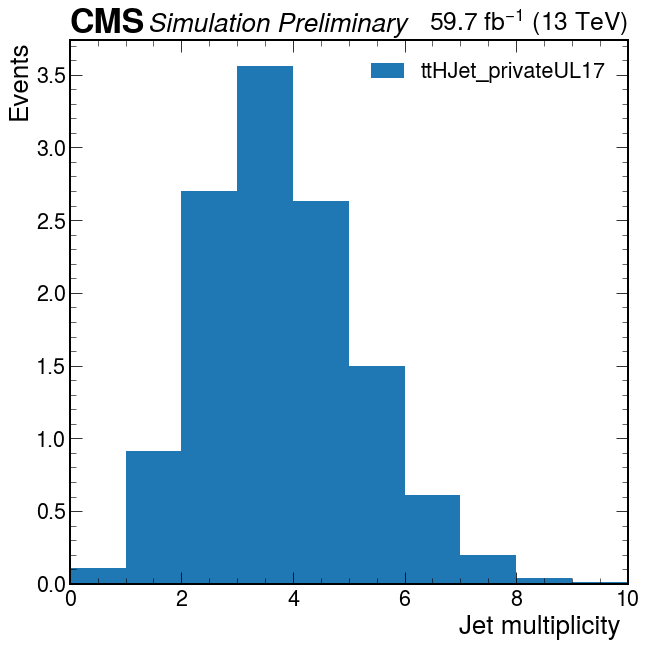

In [30]:
import mplhep
plt.style.use(mplhep.style.CMS)

fig, ax = plt.subplots(1,1) #create an axis for plotting
hist.plot1d(h, ax=ax, stack=True)
ax.legend()

# add some labels
lumi = mplhep.cms.label(ax=ax, lumi=59.7, label="Preliminary")